In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import re

%matplotlib notebook

In [308]:
japan_data = {'LS': pd.read_html('http://www.jsfresults.com/National/2017-2018/fs_e/nationals/data0203.htm'),
              'MS': pd.read_html('http://www.jsfresults.com/National/2017-2018/fs_e/nationals/data0103.htm'),
              'LF': pd.read_html('http://www.jsfresults.com/National/2017-2018/fs_e/nationals/data0205.htm'),
              'MF': pd.read_html('http://www.jsfresults.com/National/2017-2018/fs_e/nationals/data0105.htm')}

In [309]:
russia_data = {'LS': pd.read_html('http://www.fsrussia.ru/results/1718/rusnat1718_ENG/SEG003.HTM'),
               'MS': pd.read_html('http://www.fsrussia.ru/results/1718/rusnat1718_ENG/SEG001.HTM'),
               'LF': pd.read_html('http://www.fsrussia.ru/results/1718/rusnat1718_ENG/SEG004.HTM'),
               'MF': pd.read_html('http://www.fsrussia.ru/results/1718/rusnat1718_ENG/SEG002.HTM')}

In [310]:
usa_data = {'LS': pd.read_html('http://www.usfigureskating.org/leaderboard/results/2018/26192/CAT017SEG030.html'),
            'MS': pd.read_html('http://www.usfigureskating.org/leaderboard/results/2018/26192/CAT018SEG035.html'),
            'LF': pd.read_html('http://www.usfigureskating.org/leaderboard/results/2018/26192/CAT017SEG031.html'),
            'MF': pd.read_html('http://www.usfigureskating.org/leaderboard/results/2018/26192/CAT018SEG036.html')}

In [311]:
ogames_data = {'LS': pd.read_html('http://www.isuresults.com/results/season1718/owg2018/SEG003.HTM'),
               'MS': pd.read_html('http://www.isuresults.com/results/season1718/owg2018/SEG001.HTM'),
               'LF': pd.read_html('http://www.isuresults.com/results/season1718/owg2018/SEG004.HTM'),
               'MF': pd.read_html('http://www.isuresults.com/results/season1718/owg2018/SEG002.HTM')}

In [392]:
#clean data

japan_scores = {}
russia_scores = {}
usa_scores = {}
ogames_scores = {}

#Japan
for k,v in japan_data.items():
    jap = v[0]
    jap.columns = jap.iloc[0]
    jap = jap[1:]
    japan_scores[k] = jap[['TES','PCS']]

#Russia

for k,v in russia_data.items():
    russia = v[0]
    russia.columns = russia.iloc[0]
    russia = russia[1:]
    russia_scores[k] = russia[['TES+','PCS+']]

#USA
for k,v in usa_data.items():
    usa_scores_ind = [v[i] for i in range(0,len(v)) if len(v[i])==1]
    usa = pd.concat(usa_scores_ind, ignore_index=True).reset_index(drop = True)
    usa.index +=1
    usa = usa[np.isnan(usa['Factored Program Components'])==False][['Executed Elements','Factored Program Components']]
    usa_scores[k] = usa

#Olympic Games 2018
for k,v in ogames_data.items():
    ogames = v[2]
    ogames.columns = ogames.iloc[0]
    ogames = ogames[1:]
    ogames_scores[k] = ogames[['TES+','PCS+']]

#union all data
cols = {0:'jts', 1:'jps', 2:'rts', 3:'rps', 4:'uts', 5:'ups', 6:'ots', 7:'ops'}
pr1 = 'LF'
pr2 = 'MF'
scores_l = (pd.concat([japan_scores[pr1],russia_scores[pr1],usa_scores[pr1], ogames_scores[pr1]],
                      axis=1,
                      ignore_index=True,
                      join='inner')
            .rename(columns=cols)
            .astype('float64'))
scores_m = (pd.concat([japan_scores[pr2],russia_scores[pr2],usa_scores[pr2], ogames_scores[pr2]],
                      axis=1,
                      ignore_index=True,
                      join='inner')
            .rename(columns=cols)
            .astype('float64'))

#OLympic Games minimum scores for top18
mints_ogames_l = scores_l.describe().loc['min','ots']
minps_ogames_l = scores_l.describe().loc['min','ops']
mints_ogames_m = scores_m.describe().loc['min','ots']
minps_ogames_m = scores_m.describe().loc['min','ops']

<IPython.core.display.Javascript object>


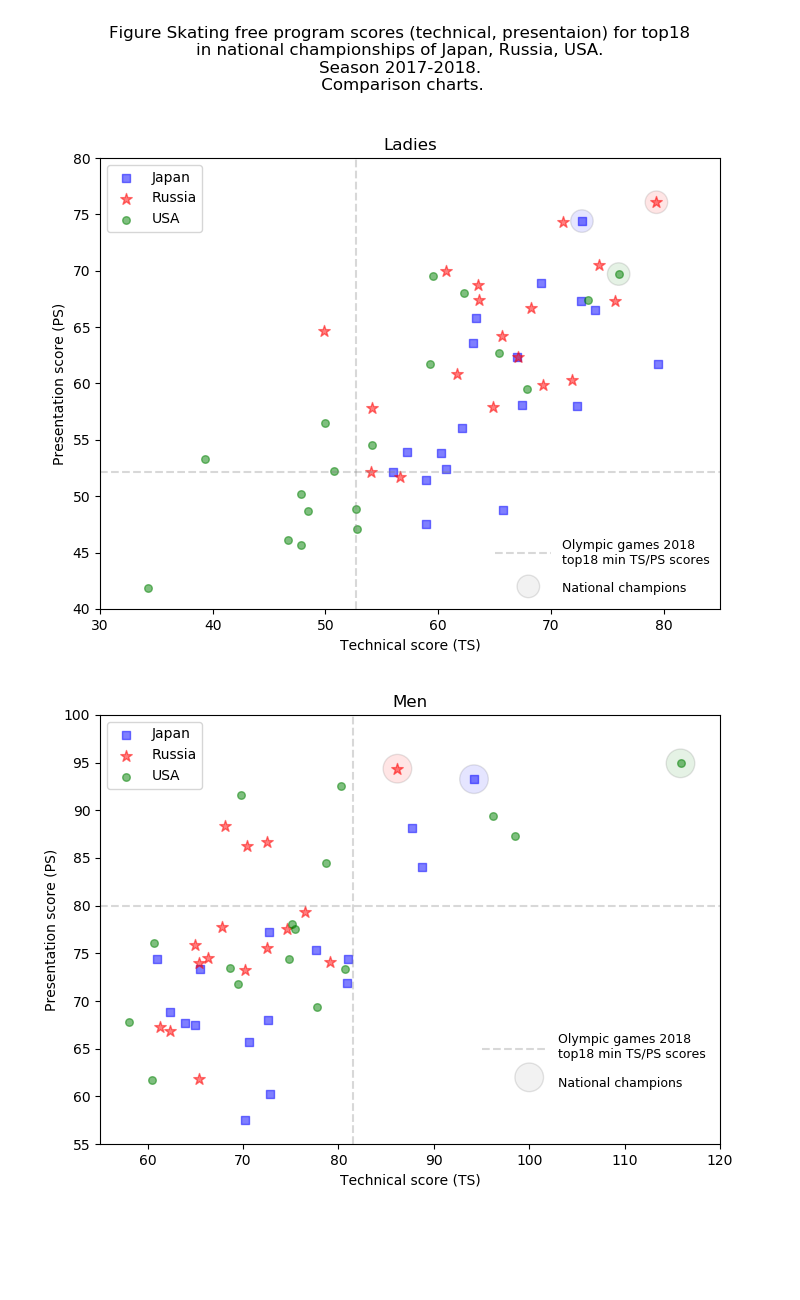

In [470]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,13))

fig.suptitle('Figure Skating free program scores (technical, presentaion) for top18\nin national championships of Japan, Russia, USA.\nSeason 2017-2018.\n Comparison charts.')

ax = scores_l.plot.scatter(x='jts', y='jps', color='Blue',alpha=0.5, label='Japan',marker='s', s=30,ax=axes[0]);
scores_l.plot.scatter(x='rts', y='rps', color='Red',alpha=0.5, label='Russia', marker='*', s=75, ax=axes[0]);
scores_l.plot.scatter(x='uts', y='ups', color='Green', alpha=0.5,label='USA',marker='o',s=30, ax=axes[0]);

ax.axvline(mints_ogames_l, alpha = 0.3, ls='--', color='Gray')
ax.axhline(minps_ogames_l, alpha = 0.3, ls='--', color='Gray')
ax.set_aspect("equal")
ax.set_xlim(30,85)
ax.set_ylim(40,80)
ax.set_title('Ladies')

ax.add_artist(Circle((scores_l.loc[1,'rts'],scores_l.loc[1,'rps']),1,alpha=0.1, edgecolor='Black', facecolor='Red'));
ax.add_artist(Circle((scores_l.loc[1,'jts'],scores_l.loc[1,'jps']),1,alpha=0.1, edgecolor='Black', facecolor='BLue'));
ax.add_artist(Circle((scores_l.loc[1,'uts'],scores_l.loc[1,'ups']),1,alpha=0.1, edgecolor='Black', facecolor='Green'));

ax.xaxis.set_label_text('Technical score (TS)')
ax.yaxis.set_label_text('Presentation score (PS)')
ax.legend(loc='upper left')
ax.plot([65,70],[45,45], color='Gray', ls='--', alpha = 0.3)
ax.text(71,44,'Olympic games 2018\ntop18 min TS/PS scores', fontsize=9);

ax.add_artist(Circle((68,42),1,alpha=0.1, edgecolor='Black', facecolor='Gray'))
ax.text(71,41.5,'National champions', fontsize=9);


ax2 = scores_m.plot.scatter(x='jts', y='jps', color='Blue',alpha=0.5, label='Japan',marker='s', s=30,ax=axes[1]);
scores_m.plot.scatter(x='rts', y='rps', color='Red',alpha=0.5, label='Russia', marker='*', s=75, ax = axes[1]);
scores_m.plot.scatter(x='uts', y='ups', color='Green', alpha=0.5,label='USA',marker='o',s=30, ax=axes[1]);

ax2.axvline(mints_ogames_m, alpha = 0.3, ls='--', color='Gray')
ax2.axhline(minps_ogames_m, alpha = 0.3, ls='--', color='Gray')
ax2.set_aspect("equal")
ax2.set_xlim(55,120)
ax2.set_ylim(55,100)
ax2.set_title('Men')

ax2.add_artist(Circle((scores_m.loc[1,'rts'],scores_m.loc[1,'rps']),1.5,alpha=0.1, edgecolor='Black', facecolor='Red'));
ax2.add_artist(Circle((scores_m.loc[1,'jts'],scores_m.loc[1,'jps']),1.5,alpha=0.1, edgecolor='Black', facecolor='BLue'));
ax2.add_artist(Circle((scores_m.loc[1,'uts'],scores_m.loc[1,'ups']),1.5,alpha=0.1, edgecolor='Black', facecolor='Green'));

ax2.xaxis.set_label_text('Technical score (TS)')
ax2.yaxis.set_label_text('Presentation score (PS)')
ax2.legend(loc='upper left')
ax2.plot([95,102],[65,65], color='Gray', ls='--', alpha = 0.3)
ax2.text(103,64,'Olympic games 2018\ntop18 min TS/PS scores', fontsize=9);

ax2.add_artist(Circle((100,62),1.5,alpha=0.1, edgecolor='Black', facecolor='Gray'))
ax2.text(103,61,'National champions', fontsize=9);

In [472]:
fig.savefig('fs1718.png', frameon=True)